In [80]:
from scipy.stats import bernoulli
from matplotlib import pyplot as plt
import numpy as np

In [81]:
def trials(epsilons, coins, repetitions, bias):
    trials = np.random.binomial(n=1, p=bias, size=(repetitions, coins))
    means = trials.mean(axis=1)

    emp_frequencies = []
    for a in epsilons:
        emp_frequencies.append(np.sum(means >= a) / repetitions)
    
    return emp_frequencies

def markovs_inequality(E, a):
    return E/a 

#return  1/20 * (0 - 0.5)**2 / (a**2)
def chebyshevs_inequality(E, a, n, bias):
    chebyshevsBound = (bias*(-bias)**2 + (1-bias)*(1 - bias)**2) / (n *a**2)
    return chebyshevsBound
    variance = (E - E**2)
    return variance / (n * a**2)

def hoeffdings_inequality(a, n):
	y = np.exp (-2*n*a**2) 
	return y

def plot(emp_frequencies, markovs_inequalities, chebyshevs_inequalities, hoeffdings_inequalities, epsilons):
    plt.plot(epsilons, emp_frequencies, label="Empirical Frequency")
    plt.plot(epsilons, markovs_inequalities, label="Markovs bound")
    plt.plot(epsilons, chebyshevs_inequalities, label="Chebyshevs bound")
    plt.plot(epsilons, hoeffdings_inequalities, label="Hoeffdings bound")
    plt.xlabel("$\\alpha$")
    plt.ylabel("P(X) >= $\\alpha$")
    plt.legend()
    plt.show()

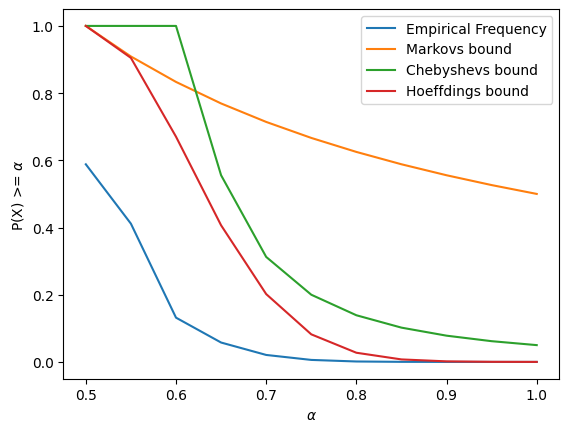

In [82]:
# Granularity in number of a's must be equal to number of coin tosses. The mean can assume len(ass) number of values. For 1 coin, it can be 0 or 1, for 2 coins it can be 0, 0.5 or 1, etc.
epsilons = np.arange(0.5, 1.05, 0.05)
coins = 20
repetitions = 10**6
bias = 0.5
E = bias
mu = bias

emp_frequencies = trials(epsilons, coins, repetitions, bias)

markovs_inequalities = [min(markovs_inequality(E, a), 1.0) for a in epsilons]
chebyshevs_inequalities = [min(chebyshevs_inequality(E, a - mu, coins, bias) if a - mu > 0 else 1, 1.0) for a in epsilons]
hoeffdings_inequalities = [min(hoeffdings_inequality(a - mu, coins), 1.0) for a in epsilons]
plot(emp_frequencies, markovs_inequalities, chebyshevs_inequalities, hoeffdings_inequalities, epsilons)

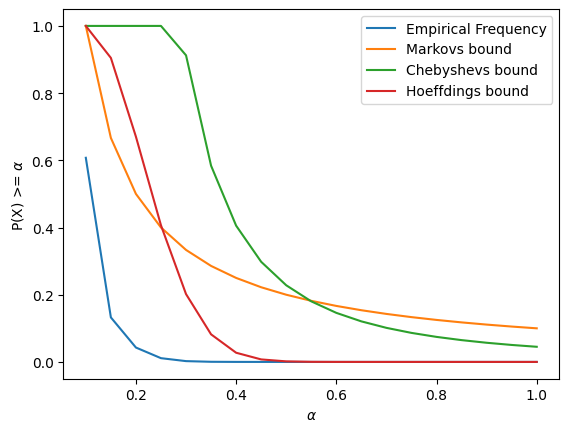

In [83]:
# Granularity in number of a's must be equal to number of coin tosses. The mean can assume len(ass) number of values. For 1 coin, it can be 0 or 1, for 2 coins it can be 0, 0.5 or 1, etc.
epsilons = np.arange(0.1, 1.05, 0.05)
coins = 20
repetitions = 10**6
bias = 0.1
E = bias
mu = bias

emp_frequencies = trials(epsilons, coins, repetitions, bias)

markovs_inequalities = [min(markovs_inequality(E, a), 1.0) for a in epsilons]
chebyshevs_inequalities = [min(chebyshevs_inequality(E, a - mu, coins, bias) if a - mu > 0 else 1, 1.0) for a in epsilons]
hoeffdings_inequalities = [min(hoeffdings_inequality(a - mu, coins), 1.0) for a in epsilons]
plot(emp_frequencies, markovs_inequalities, chebyshevs_inequalities, hoeffdings_inequalities, epsilons)

In [84]:
epsilons = np.arange(1, 10, 1)
rvs = [np.random.binomial(n=1, p=1/a**2, size=(1000, 50)) for a in epsilons]
means = [r.mean(axis=1) for r in rvs]
markovs_inequalities = [min(markovs_inequality(E, a), 1.0) for a in epsilons]
#bernouli_samples = [bernoulli(a).rvs(1)  for a in epsilons]